In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape)
print(test.shape)

train.columns.values

(1460, 81)
(1459, 80)


array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [2]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

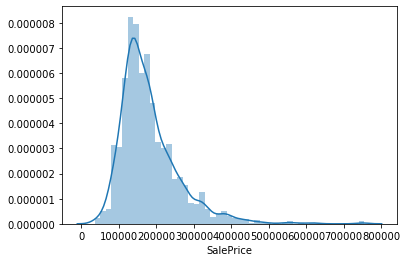

In [4]:
sns.distplot(train['SalePrice'])

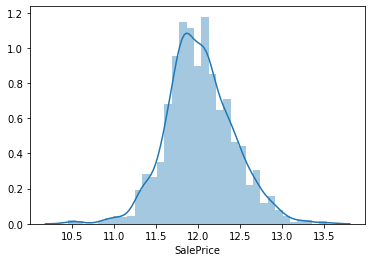

In [5]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'])

In [6]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

In [7]:
# quali
qual = train.select_dtypes(include=['object']).columns
print(qual)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
#quanti
quan = train.select_dtypes(include=['int64','float64']).columns
print(quan)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [9]:
num_quan = len(train.select_dtypes(include=['int64','float64']).columns)
num_qual = len(train.select_dtypes(include=['object']).columns)

print(f"{num_quan} features numériques & {num_qual} features catégorielles")

37 features numériques & 43 features catégorielles


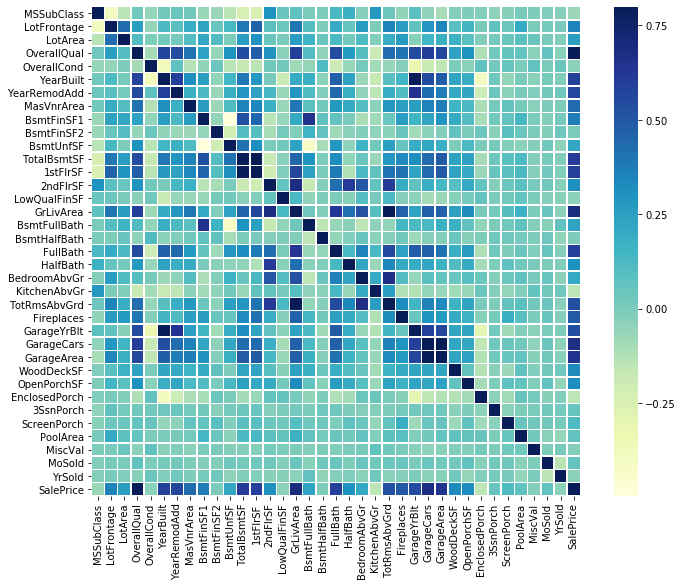

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

In [11]:

train[quan]
corr_output = dict()

for x in train[quan]:
    corr_output[x] = round(train[x].corr(train['SalePrice']),2)
    
for key in sorted(corr_output,key =corr_output.get, reverse=True):
    if corr_output[key] >= 0.5:
            print(key, corr_output[key])  
            

# corr_mat de ces 10 features

k = 11
cols = corrmat.nlargest(k,'SalePrice').index
cols 

corr_mat_10 = train[cols].corr()
corr_mat_10

SalePrice 1.0
OverallQual 0.82
GrLivArea 0.7
GarageCars 0.68
GarageArea 0.65
TotalBsmtSF 0.61
1stFlrSF 0.6
YearBuilt 0.59
FullBath 0.59
YearRemodAdd 0.57
GarageYrBlt 0.54
TotRmsAbvGrd 0.53


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt
SalePrice,1.000000,0.817185,0.700927,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608,0.541073
OverallQual,0.817185,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684,0.547766
GrLivArea,0.700927,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.199010,0.287389,0.231197
GarageCars,0.680625,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622,0.588920
GarageArea,0.650888,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600,0.564567
TotalBsmtSF,0.612134,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066,0.322445
1stFlrSF,0.596981,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379,0.233449
FullBath,0.594771,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046,0.484557
YearBuilt,0.586570,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855,0.825667
YearRemodAdd,0.565608,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000,0.642277


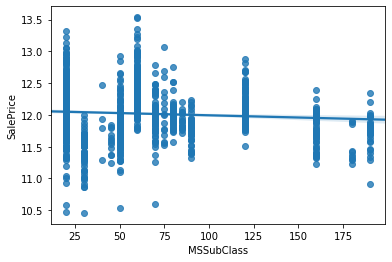

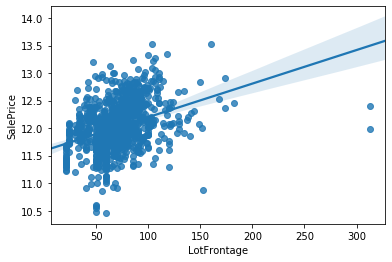

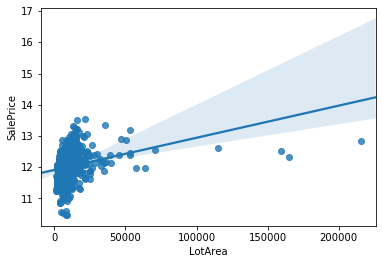

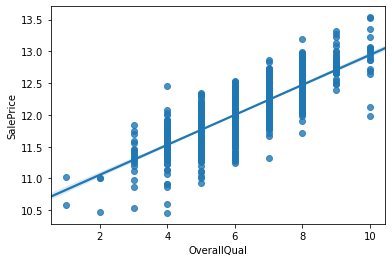

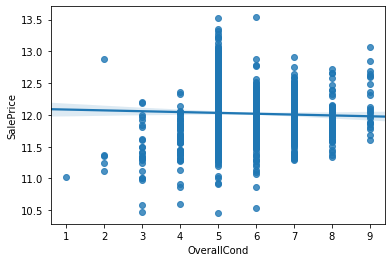

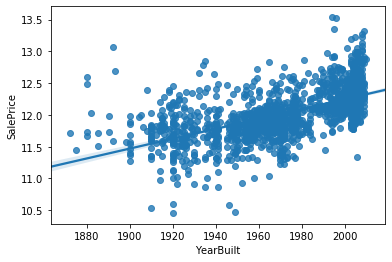

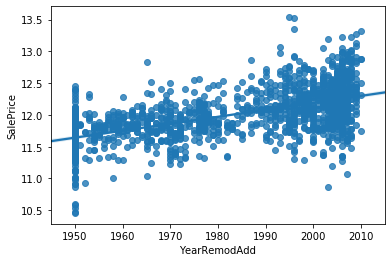

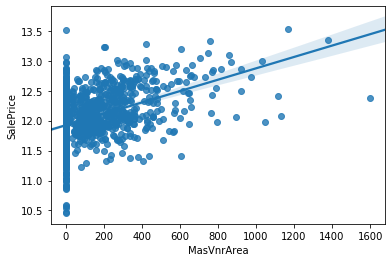

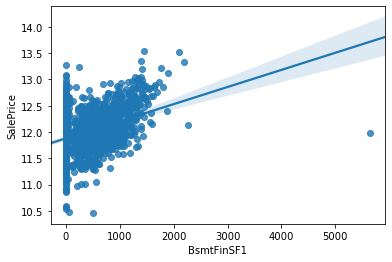

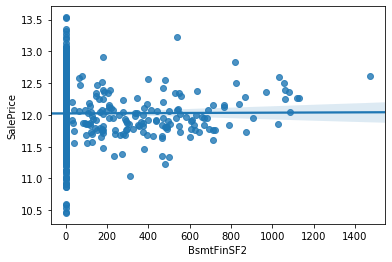

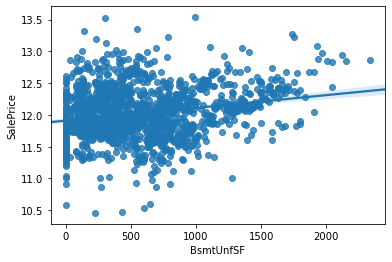

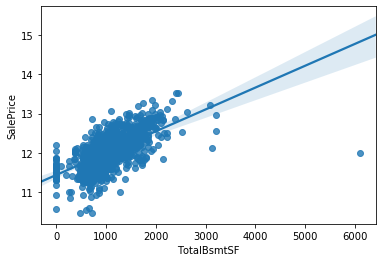

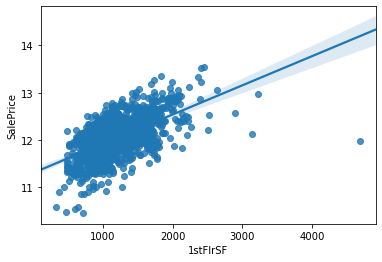

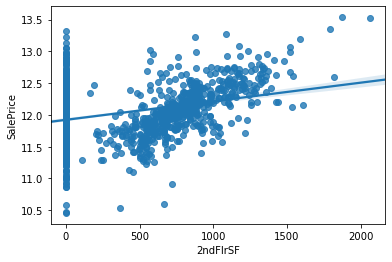

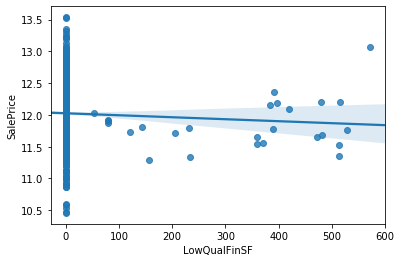

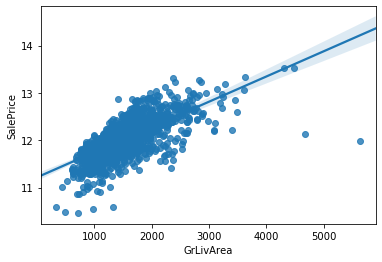

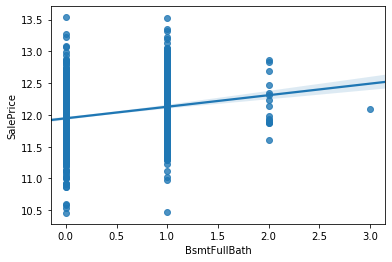

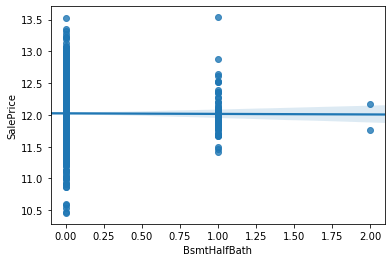

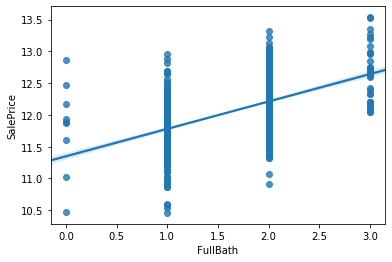

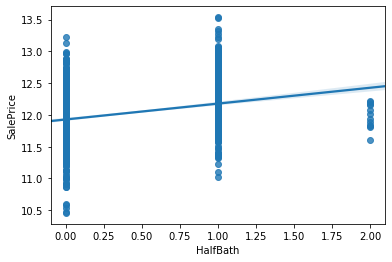

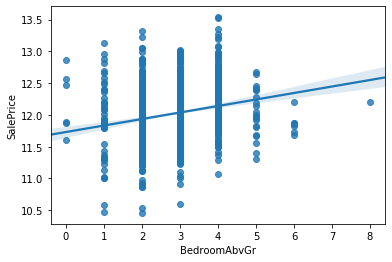

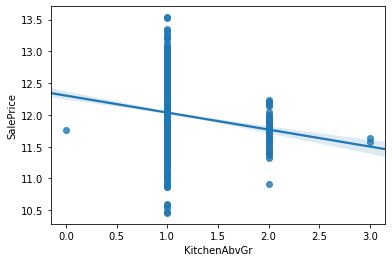

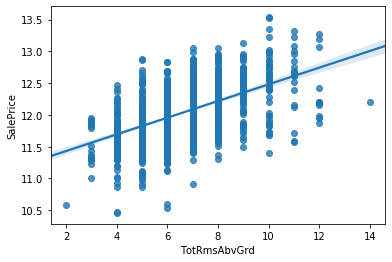

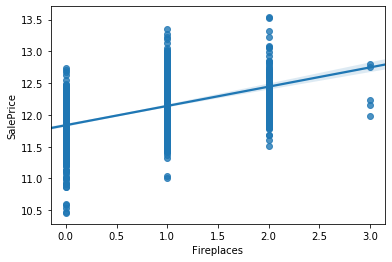

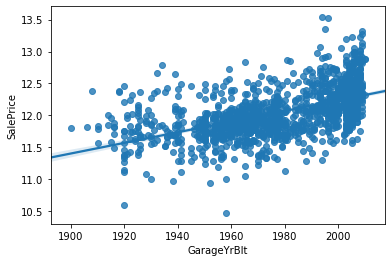

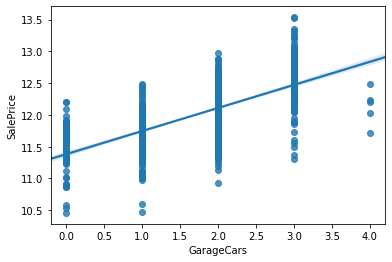

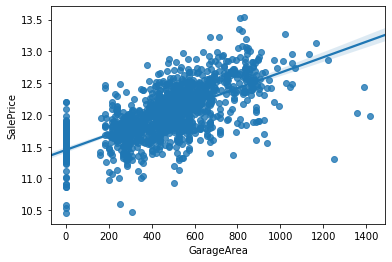

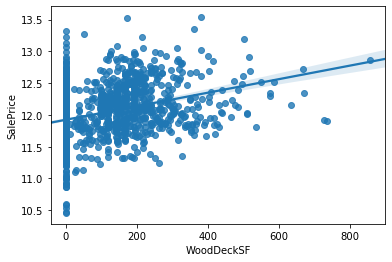

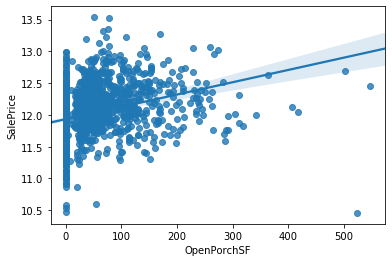

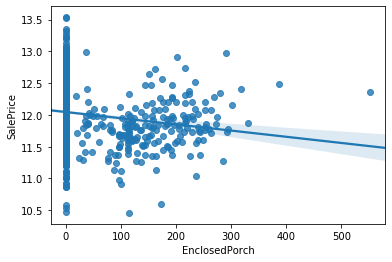

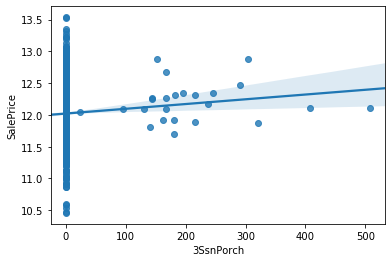

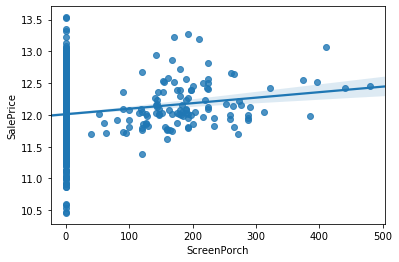

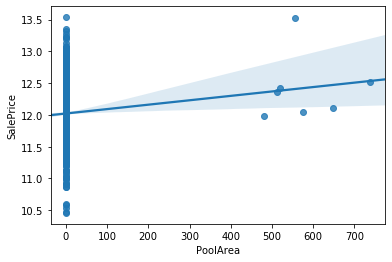

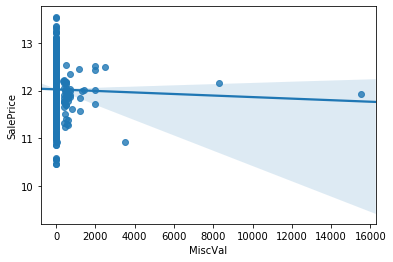

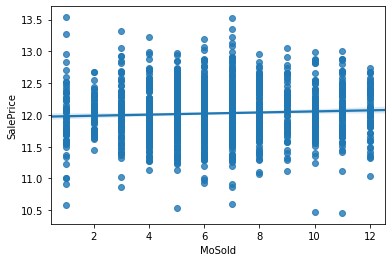

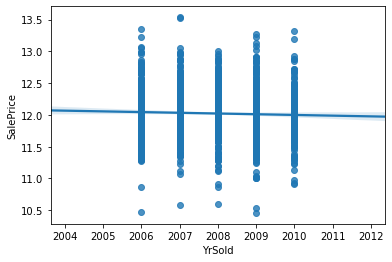

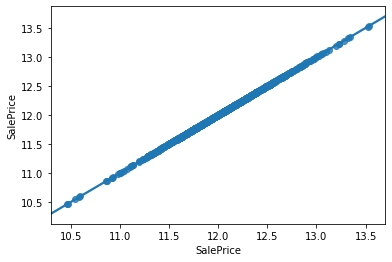

In [12]:
for feature in train[quan]:
    sns.regplot(x=feature,y='SalePrice', data=train)
    plt.show()

corr : 0.36


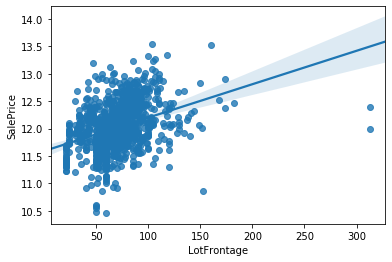

In [13]:
sns.regplot(x='LotFrontage',y='SalePrice', data=train)
print(f"corr : {round(train['LotFrontage'].corr(train['SalePrice']),2)}")

corr : 0.38


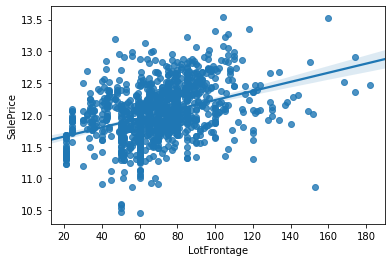

In [14]:
train = train.drop(train[(train['LotFrontage']>300)].index).reset_index(drop=True)
sns.regplot(x='LotFrontage',y='SalePrice', data=train)
print(f"corr : {round(train['LotFrontage'].corr(train['SalePrice']),2)}")

corr : 0.26


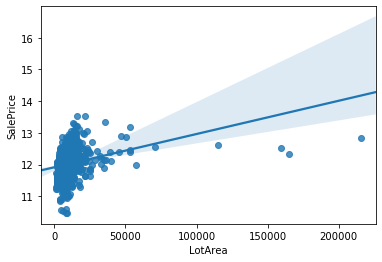

In [15]:
sns.regplot(x='LotArea',y='SalePrice', data=train)
print(f"corr : {round(train['LotArea'].corr(train['SalePrice']),2)}")

corr : 0.34


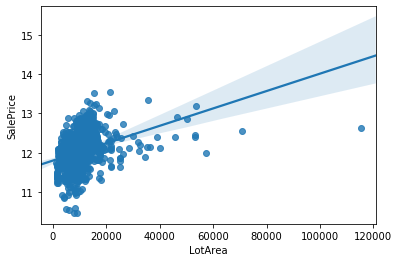

In [16]:
train = train.drop(train[(train['LotArea']>150000)].index).reset_index(drop=True)
sns.regplot(x='LotArea',y='SalePrice', data=train)
print(f"corr : {round(train['LotArea'].corr(train['SalePrice']),2)}")

corr : 0.39


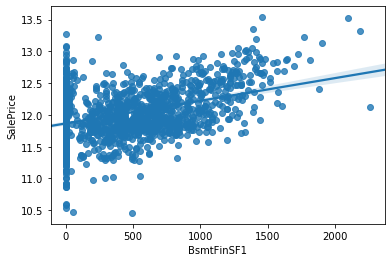

In [17]:
sns.regplot(x='BsmtFinSF1',y='SalePrice', data=train)
print(f"corr : {round(train['BsmtFinSF1'].corr(train['SalePrice']),2)}")

corr : 0.39


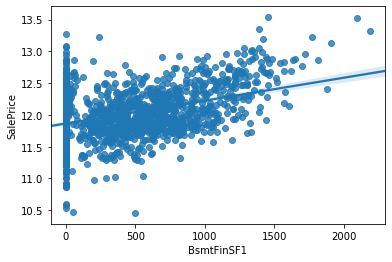

In [18]:
train = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<12.5)].index).reset_index(drop=True)
sns.regplot(x='BsmtFinSF1',y='SalePrice', data=train)
print(f"corr : {round(train['BsmtFinSF1'].corr(train['SalePrice']),2)}")

corr : 0.66


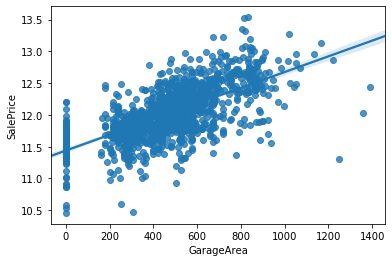

In [19]:
sns.regplot(x='GarageArea',y='SalePrice', data=train)
print(f"corr : {round(train['GarageArea'].corr(train['SalePrice']),2)}")

corr : 0.67


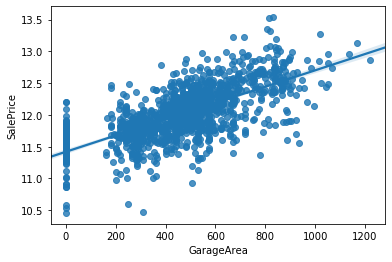

In [20]:
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<12.5)].index).reset_index(drop=True)
sns.regplot(x='GarageArea',y='SalePrice', data=train)
print(f"corr : {round(train['GarageArea'].corr(train['SalePrice']),2)}")

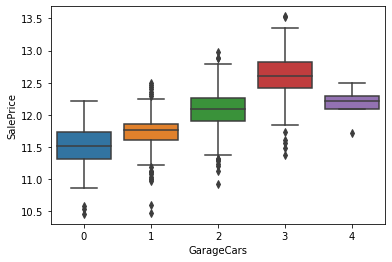

In [21]:
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

In [22]:
train = train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<12.5)].index).reset_index(drop=True)
print(f"corr : {round(train['GarageCars'].corr(train['SalePrice']),2)}")

corr : 0.69


corr : 0.34


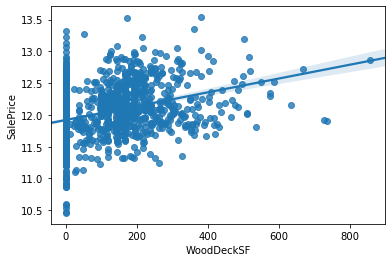

In [23]:
sns.regplot(x='WoodDeckSF',y='SalePrice', data=train)
print(f"corr : {round(train['WoodDeckSF'].corr(train['SalePrice']),2)}")

In [24]:
train = train.drop(train[(train['WoodDeckSF']>600) & (train['SalePrice']<12)].index).reset_index(drop=True)
print(f"corr : {round(train['WoodDeckSF'].corr(train['SalePrice']),2)}")

corr : 0.35


corr : 0.33


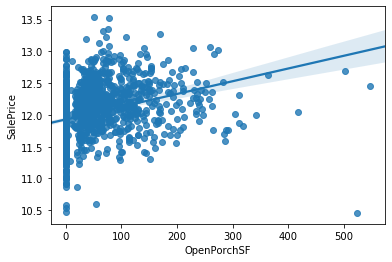

In [25]:
sns.regplot(x='OpenPorchSF',y='SalePrice', data=train)
print(f"corr : {round(train['OpenPorchSF'].corr(train['SalePrice']),2)}")

In [26]:
train = train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<11)].index).reset_index(drop=True)
print(f"corr : {round(train['OpenPorchSF'].corr(train['SalePrice']),2)}")

corr : 0.36


In [27]:
print(train.shape)
print(f"Supression de {1460-1444} outliers")

(1444, 80)
Supression de 16 outliers


In [28]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
datas = pd.concat((train, test)).reset_index(drop=True)
datas.drop(['SalePrice'], axis=1, inplace=True)

print(train.shape)
print(test.shape)
print(datas.shape)

(1444, 80)
(1459, 79)
(2903, 79)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [29]:
hasNAN = round((datas.isnull().sum() / len(datas)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
hasNAN = hasNAN[hasNAN > 0] # On enleve celles qui n'ont pas de valeurs nulles 
hasNAN = hasNAN.sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio': hasNAN})
missing_values

,Missing Ratio
PoolQC,99.69
MiscFeature,96.49
Alley,93.21
Fence,80.43
FireplaceQu,48.71
LotFrontage,16.64
GarageQual,5.44
GarageCond,5.44
GarageFinish,5.44
GarageYrBlt,5.44


In [30]:
datas["PoolQC"] = datas["PoolQC"].fillna("None")
datas["MiscFeature"] = datas["MiscFeature"].fillna("None")
datas["Alley"] = datas["Alley"].fillna("None")
datas["Fence"] = datas["Fence"].fillna("None")
datas["FireplaceQu"] = datas["FireplaceQu"].fillna("None")
datas["LotFrontage"] = datas.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    datas[col] = datas[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    datas[col] = datas[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    datas[col] = datas[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    datas[col] = datas[col].fillna('None')
datas["MasVnrType"] = datas["MasVnrType"].fillna("None")
datas["MasVnrArea"] = datas["MasVnrArea"].fillna(0)
datas['MSZoning'] = datas.groupby("Neighborhood")['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
datas = datas.drop(['Utilities'], axis=1)
datas["Functional"] = datas["Functional"].fillna("Typ")
datas['Electrical'] = datas['Electrical'].fillna(datas['Electrical'].mode()[0])
datas['KitchenQual'] = datas['KitchenQual'].fillna(datas['KitchenQual'].mode()[0])
datas['Exterior1st'] = datas['Exterior1st'].fillna(datas['Exterior1st'].mode()[0])
datas['Exterior2nd'] = datas['Exterior2nd'].fillna(datas['Exterior2nd'].mode()[0])
datas['SaleType'] = datas['SaleType'].fillna(datas['SaleType'].mode()[0])
datas['MSSubClass'] = datas['MSSubClass'].fillna("None")

In [31]:
hasNAN = round((datas.isnull().sum() / len(datas)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
hasNAN = hasNAN[hasNAN > 0] # On enleve celles qui n'ont pas de valeurs nulles 
hasNAN = hasNAN.sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio': hasNAN})
missing_values

,Missing Ratio


In [32]:

datas.Alley = datas.Alley.map({'None':0, 'Grvl':1, 'Pave':2})
datas.BsmtCond =  datas.BsmtCond.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.BsmtExposure = datas.BsmtExposure.map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
datas['BsmtFinType1'] = datas['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
datas['BsmtFinType2'] = datas['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
datas.BsmtQual = datas.BsmtQual.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.ExterCond = datas.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.ExterQual = datas.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.FireplaceQu = datas.FireplaceQu.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.Functional = datas.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
datas.GarageCond = datas.GarageCond.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.GarageQual = datas.GarageQual.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.HeatingQC = datas.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.KitchenQual = datas.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.LandSlope = datas.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
datas.PavedDrive = datas.PavedDrive.map({'N':1, 'P':2, 'Y':3})
datas.PoolQC = datas.PoolQC.map({'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
datas.Street = datas.Street.map({'Grvl':1, 'Pave':2})
datas.GarageFinish = datas.GarageFinish.map(({'None':0 ,'Unf':1 ,'RFn':2, 'Fin':3}))
datas.CentralAir = datas.CentralAir.map(({'N':0 ,'Y':1}))
datas.MSSubClass = datas.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

In [33]:
num_quan_data = len(datas.select_dtypes(include=['int64','float64']).columns)
num_qual_data = len(datas.select_dtypes(include=['object']).columns)

print(f"{num_quan_data} features numériques & {num_qual_data} features catégorielles")

55 features numériques & 23 features catégorielles


In [34]:
# quali
qual_data = datas.select_dtypes(include=['object']).columns
print(qual_data)

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Fence', 'Foundation', 'GarageType', 'Heating',
       'HouseStyle', 'LandContour', 'LotConfig', 'LotShape', 'MSSubClass',
       'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')


In [35]:
quan_data = datas.select_dtypes(include=['int64','float64']).columns
print(quan_data)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'FireplaceQu',
       'Fireplaces', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandSlope',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolArea', 'PoolQC', 'ScreenPorch', 'Street', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')


In [36]:
print(datas.shape)

(2903, 78)


In [37]:
from scipy.stats import skew
for i in quan_data:
    print(f"{i} : {round(skew(datas[i]),2)}")

1stFlrSF : 1.27
2ndFlrSF : 0.86
3SsnPorch : 11.34
Alley : 4.14
BedroomAbvGr : 0.31
BsmtCond : -3.6
BsmtExposure : 1.12
BsmtFinSF1 : 0.99
BsmtFinSF2 : 4.16
BsmtFinType1 : -0.15
BsmtFinType2 : 3.16
BsmtFullBath : 0.61
BsmtHalfBath : 3.95
BsmtQual : -1.27
BsmtUnfSF : 0.92
CentralAir : -3.47
EnclosedPorch : 4.01
ExterCond : 1.31
ExterQual : 0.78
FireplaceQu : 0.18
Fireplaces : 0.73
FullBath : 0.17
Functional : -4.97
GarageArea : 0.17
GarageCars : -0.25
GarageCond : -3.38
GarageFinish : 0.14
GarageQual : -3.26
GarageYrBlt : -3.91
GrLivArea : 1.08
HalfBath : 0.69
HeatingQC : -0.55
KitchenAbvGr : 4.33
KitchenQual : 0.43
LandSlope : -5.0
LotArea : 5.32
LotFrontage : 0.63
LowQualFinSF : 12.05
MasVnrArea : 2.63
MiscVal : 21.92
MoSold : 0.2
OpenPorchSF : 2.48
OverallCond : 0.57
OverallQual : 0.19
PavedDrive : -2.98
PoolArea : 17.65
PoolQC : 20.29
ScreenPorch : 3.93
Street : -16.95
TotRmsAbvGrd : 0.75
TotalBsmtSF : 0.67
WoodDeckSF : 1.8
YearBuilt : -0.6
YearRemodAdd : -0.45
YrSold : 0.13


In [38]:
# transform those with skewness > 0.5
skewed_features = np.array(quan_data)[np.abs(skew(datas[quan_data])) > 0.5]
datas[skewed_features] = np.log1p(datas[skewed_features])

In [39]:
dummy_drop=[]
for i in qual_data:
    dummy_drop += [i+'_'+str(datas[i].unique()[-1])] # Rajoute dans une liste la derniere valeur de chaque features ex:
    # Sexe : Homme ou Femme , va rajouter dans dummy_drop Femme
    
# create dummy variables
datas = pd.get_dummies(datas,columns=qual_data) 
# drop the last column generated from each categorical feature
datas = datas.drop(dummy_drop,axis=1)

In [40]:
print(datas.shape)

(2903, 218)


In [41]:
train = datas[:ntrain]
test = datas[ntrain:]

In [42]:
print(train.shape)
print(test.shape)

(1444, 218)
(1459, 218)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [44]:
train['SalePrice'] = y_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
from numpy import random
SEED = 42
random.seed(SEED)
train_m, val=train_test_split(train, test_size=0.3)

print("Train full shape: " + str(train.shape))
print("Train shape: " + str(train_m.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1444, 219)
Train shape: (1010, 219)
Val shape: (434, 219)


In [46]:

target_column = 'SalePrice'
y_train = train_m[target_column].values
X_train = train_m.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
y_val = val[target_column].values

In [47]:

import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

[17:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
y_val_predict = model_xgb.predict(X_val)
mean_squared_error(y_val,y_val_predict)

0.012873293868302606

In [49]:
from sklearn.kernel_ridge import KernelRidge

In [50]:
model_krr = KernelRidge()
model_krr.fit(X_train,y_train)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [51]:
y_val_predict_krr = model_krr.predict(X_val)
mean_squared_error(y_val,y_val_predict_krr)

0.012646561718547266

In [52]:
# y_val_kaggle = np.expm1(model_xgb.predict(test.values))
y_val_kaggle = np.expm1(model_krr.predict(test.values))

In [54]:
d = {'Id':test_ID, 'SalePrice':y_val_kaggle}
sub = pd.DataFrame(data=d)
sub.to_csv('house_prices_pred.csv', index=False)

In [ ]:
import kaggle
submission_file = 'house_prices_pred.csv'
kaggle.api.competition_submit(submission_file, "Submission KernelRidge)", "house-prices-advanced-regression-techniques")